In [1]:
import pandas as pd
import re
import numpy as np


In [9]:
df = pd.read_csv('../library: main/ssmm_candidates_core.csv', sep='\t', encoding='utf-8')
df = df[['ssmm_id','name','elected_flg','member_conv_cnt','cand_conv_cnt','manage_convocation_cnt','position_cnt','honorary_flg','gender']].reset_index().drop(['index'],axis=1)
df.head()


,ssmm_id,name,elected_flg,member_conv_cnt,cand_conv_cnt,manage_convocation_cnt,position_cnt,honorary_flg,gender
0,1,Владыкина Вероника Евгеньевна,1,3.0,3,2.0,3.0,1,female
1,2,Коновалов Антон Александрович,1,2.0,2,1.0,1.0,0,male
2,3,Ласкин Алексей Александрович,1,2.0,3,NaN,NaN,0,male
3,4,Малхасян Арамаис,1,1.0,1,NaN,NaN,0,male
4,5,Попов Леонид Андреевич,1,3.0,3,2.0,2.0,1,male


In [5]:
# list(df)

In [25]:
import copy

person_df = copy.deepcopy(df)
di = {'female':1, 'male':0}
# person_df.replace({"gender": di}).rename({'gender':'female'})
person_df["gender"].replace(di, inplace=True)
# person_df = person_df.drop('gender', axis=1)
person_df.rename({'gender':'female'})
person_df = person_df.fillna(0)

person_df.head()

,ssmm_id,name,elected_flg,member_conv_cnt,cand_conv_cnt,manage_convocation_cnt,position_cnt,honorary_flg,gender
0,1,Владыкина Вероника Евгеньевна,1,3.0,3,2.0,3.0,1,1
1,2,Коновалов Антон Александрович,1,2.0,2,1.0,1.0,0,0
2,3,Ласкин Алексей Александрович,1,2.0,3,0.0,0.0,0,0
3,4,Малхасян Арамаис,1,1.0,1,0.0,0.0,0,0
4,5,Попов Леонид Андреевич,1,3.0,3,2.0,2.0,1,0


In [26]:
person_df.shape

(320, 9)

In [38]:
person_df_final = person_df[['elected_flg','member_conv_cnt','cand_conv_cnt','manage_convocation_cnt','position_cnt','honorary_flg']]


In [43]:
key_list = list(person_df['name'])


In [31]:
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from scipy.cluster.vq import kmeans, vq

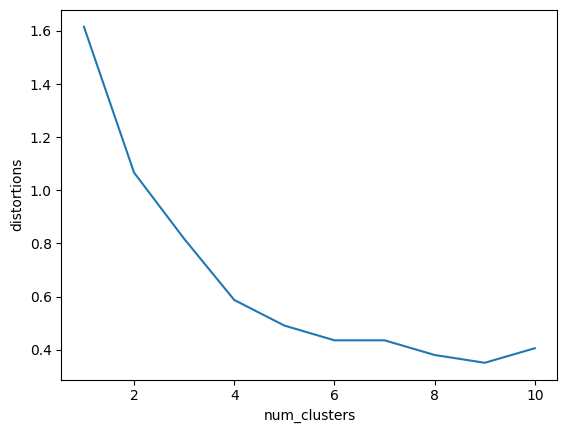

In [40]:

# Declaring variables for use
distortions = []
num_clusters_range = range(1, 11)

# Populating distortions for various clusters
for i in num_clusters_range:
    centroids, distortion = kmeans(person_df_final, i)
    distortions.append(distortion)
    
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters_range,
                                'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
             data = elbow_plot_data)
plt.show()



In [35]:
from sklearn.cluster import KMeans

In [48]:
num_clusters = 6

km = KMeans(n_clusters=num_clusters, n_init=10)

%time km.fit(person_df_final)

clusters = km.labels_.tolist()

CPU times: user 44.5 ms, sys: 42.3 ms, total: 86.9 ms
Wall time: 36.8 ms


In [49]:
program_clusters = {
    'key': key_list, 
#     'program': person_df_final, 
    'cluster': clusters
}

frame = pd.DataFrame(program_clusters, index = [clusters], columns = ['key', 'cluster'])  #'program', 

frame['cluster'].value_counts()

4    147
1     57
0     51
5     36
2     19
3     10
Name: cluster, dtype: int64

In [46]:
# to find n-th occurance of substring in the string (n = 0,1...)

def find_substring(txt, str1, n):
    parts = txt.split(str1, n + 1)
    if len(parts) <= n + 1:
        return -1
    return len(txt) - len(parts[-1]) - len(str1)

In [50]:
# print("Top terms per cluster:")
print()

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
#     print("Cluster %d words:" % i, end='')
    
#     for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
#         print('', terms[ind], end=',')
#         print('', vocab_frame.loc[terms[ind].split(' ')], end=',')
#         print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#     print() #add whitespace
#     print() #add whitespace
    
    print("Cluster %d persons:" % i, end='')
    for key in frame.loc[i]['key'].values.tolist():
#         print(' %s,' % key, end='')
        print('\t\t%s,' % key[:find_substring(key, ' ', 0)+2], end='')
    print() #add whitespace
    print() #add whitespace
    
# print() 
# print() 



Cluster 0 persons:		Ласкин А,		Самонов А,		Костицын А,		Шариков А,		Абдуллаева Э,		Удимов Д,		Чернодед А,		Власов А,		Сафина Д,		Тишин П,		Федорова Е,		Буряк А,		Тулякова А,		Сергеева Э,		Борисов В,		Бунеев А,		Хасанов Р,		Ариас-Альварес В,		Мамедов Р,		Нечаев Н,		Лапина С,		Чидякина О,		Волчанский А,		Думаревский А,		Бахметьева М,		Кравчук Н,		Проничкин Ю,		Бун-Ян-Тун В,		Провидухина М,		Сакаев Р,		Трошина Д,		Батутина М,		Зарубин Н,		Татаринцева М,		Рогачёв А,		Митрофанов Д,		Сиухина А,		Устинов Н,		Винокурова А,		Шишкин И,		Панина Т,		Пушкарёва А,		Лобанова А,		Зайцева А,		Янкова М,		Терехов М,		Пчельникова Е,		Шереметьев В,		Макаров Н,		Гаспарян И,		Янушкевич И,

Cluster 1 persons:		Валиев З,		Ульмаскулов Р,		Кунденко В,		Семенов П,		Скобенникова Ю,		Ванунц А,		Николаева Н,		Скопинцев А,		Заболотский Л,		Изимова А,		Корно Д,		Чистяков М,		Карякин И,		Таибов А,		Лучкина А,		Аленина А,		Аседова Е,		Гордеева М,		Горшков К,		Ахмеджанова М,		Коллерова С,		Ильясова А,		Матюнин В,		Шигае